In [1]:
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO
from PIL import Image
import supervision as sv
import os
import numpy as np
import easyocr
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


0: 640x512 1 Register-Number, 1 Subject-Code, 40.6ms
Speed: 5.0ms preprocess, 40.6ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 512)


[([[1, 19], [1219, 19], [1219, 175], [1, 175]], '212222040124', 0.9195478828016606)]


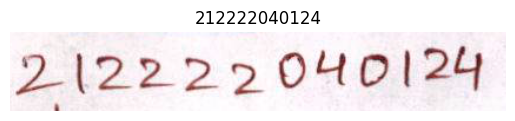

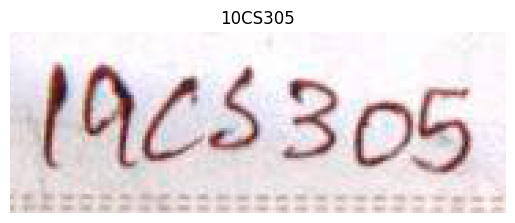

In [6]:
model = YOLO("runs\detect/train5/weights/last.pt")
folder = input("Enter the folder name(Cropped_image, Paper_Samples_Images): ")
if folder == "1":
    image = cv2.imread("Cropped_Images/" + os.listdir('Cropped_Images')
                       [np.random.randint(0, len(os.listdir('Cropped_Images'))-1)])
elif folder == "2":
    image = cv2.imread("Paper_Samples_Images/" + os.listdir('Paper_Samples_Images')
                       [np.random.randint(0, len(os.listdir('Paper_Samples_Images'))-1)])
elif folder == "3":
    image = cv2.imread("Paper_Sample_Images_2/" + os.listdir('Paper_Sample_Images_2')
                       [np.random.randint(0, len(os.listdir('Paper_Sample_Images_2'))-1)])
else:
    print("Enter the correct folder name")
'''results = model(image)
for r in results:
    # plot a BGR numpy array of predictions
    im_array = r.plot(labels=False, conf=0.5)
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    print("Predicted Classes: ", r.names)'''
results = model.predict(image,  stream=True)
output = {}
for r in results:
    for id in range(0, len(r)):
        x, y, x1, y1 = r.boxes.xyxy.cpu().numpy().astype(int)[id]
        output[r.names[r.boxes.cls.cpu().numpy()[id]]] = image[y:y1, x:x1]
reader = easyocr.Reader(['en'], gpu=True)
result = reader.readtext(
    output["Register-Number"], allowlist='0123456789', contrast_ths=1, adjust_contrast=0.1)
print(result)
plt.title(result[0][1])
plt.axis("off")
plt.imshow(output["Register-Number"])
plt.show()
result = reader.readtext(output["Subject-Code"],
                         allowlist='0123456789AIETMSCcse', contrast_ths=1, adjust_contrast=0.1)
plt.title(result[0][1].upper())
plt.axis("off")
plt.imshow(output["Subject-Code"])
plt.show()

In [7]:
def denoise_and_display_image(image):
    # Apply Fast Means Denoising
    dst = cv2.fastNlMeansDenoisingColored(image, None, 3, 5, 5, 33)

    # Create a plot to display the original and denoised images
    row, col = 1, 2
    fig, axs = plt.subplots(row, col, figsize=(15, 10))
    fig.tight_layout()
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')
    axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Fast Means Denoising')

    # Show the plot
    plt.show()
    return dst

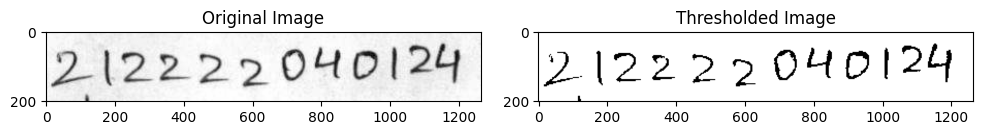

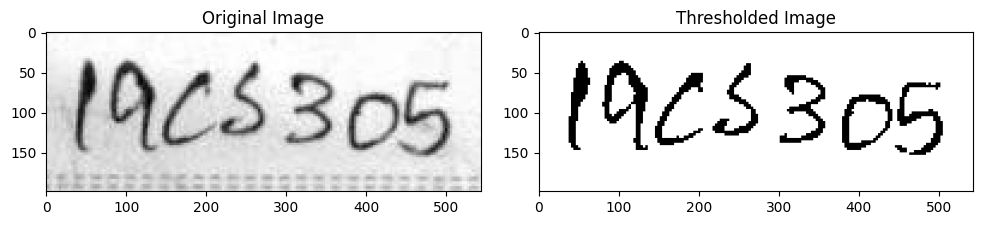

In [8]:
from numpy import imag


def threshold_and_display(image, threshold_value=128):
    """
    Apply binary thresholding to the input image, display original and thresholded images, and return the result.

    Args:
    image: Input image (numpy array).
    threshold_value: Threshold value for binary thresholding (default is 128).

    Returns:
    thresholded_image: The thresholded black and white image (numpy array).
    """
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply binary thresholding
    _, thresholded_image = cv2.threshold(
        image, threshold_value, 255, cv2.THRESH_BINARY)

    # Create a plot to display the original and thresholded images
    row, col = 1, 2
    fig, axs = plt.subplots(row, col, figsize=(10, 5))
    fig.tight_layout()
    axs[0].imshow(image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[1].imshow(thresholded_image, cmap='gray')
    axs[1].set_title('Thresholded Image')

    # Show the plot
    plt.show()

    return cv2.cvtColor(thresholded_image, cv2.COLOR_GRAY2BGR)


# Example usage
output['Register-Number_threshold'] = threshold_and_display(
    output['Register-Number'], threshold_value=128)
output['Subject-Code_threshold'] = threshold_and_display(
    output['Subject-Code'], threshold_value=145)

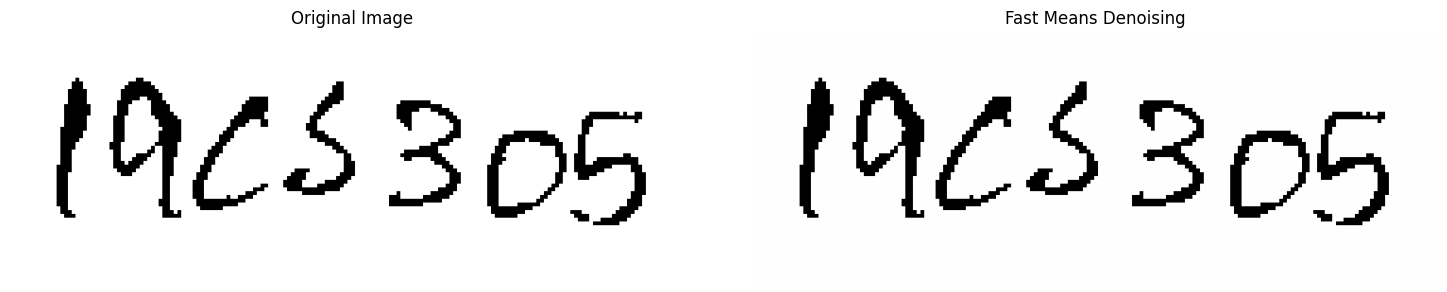

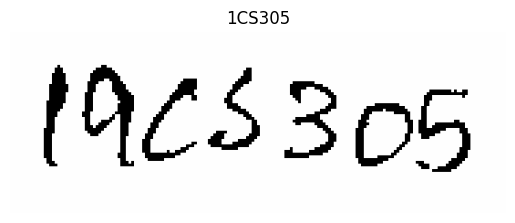

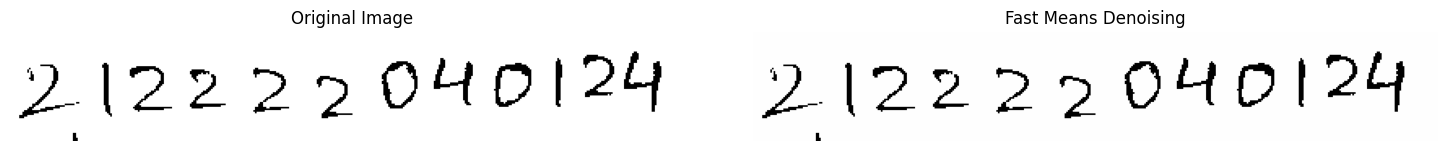

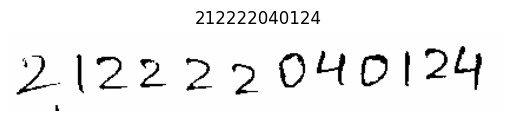

In [10]:
output['Subject-Code_denoise'] = denoise_and_display_image(
    output["Subject-Code_threshold"])
result = reader.readtext(output["Subject-Code_denoise"],
                         allowlist='0123456789AIlETMSCcse')
plt.title(result[0][1].upper())
plt.axis("off")
plt.imshow(output["Subject-Code_denoise"])
plt.show()
# Register Number
output['Register-Number_denoise'] = denoise_and_display_image(
    output["Register-Number_threshold"])
result = reader.readtext(output['Register-Number_denoise'],
                         allowlist='0123456789')
plt.title(result[0][1].upper())
plt.axis("off")
plt.imshow(output["Register-Number_denoise"])
plt.show()